In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [26]:
# Access the data file from the FBI: UCR 
dataset = pd.read_excel("NYCCrime.xls", header=4)

In [27]:
# Change the dataset into a DataFrame
data = pd.DataFrame(dataset)

In [28]:
# Access the Columns desired for this challenge
data_group = data.loc[:, ['Population', 'Murder and\nnonnegligent\nmanslaughter', 'Robbery']]

In [29]:
# Rename the group columns
data_group.columns = ['Population', 'Murder', 'Robbery']

In [30]:
# Drop the null values
data_group = data_group.dropna(axis=0, how='any')

In [31]:
# Drop the row where with the Population outlier of 8396126.000
data_group = data_group.drop(216)

In [32]:
# Change the Robery and Murder columns into categorical variables. 
data_group.Robbery = data_group.Robbery.where(data_group.Robbery == 0, 1)
data_group.Murder = data_group.Murder.where(data_group.Murder == 0, 1)
# Create a columns with the squared population value. 
data_group['Population^2'] = data_group.Population**2

The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

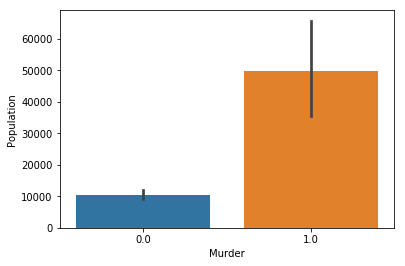

In [33]:
sns.barplot(x='Murder', y='Population', data=data_group)
plt.show()

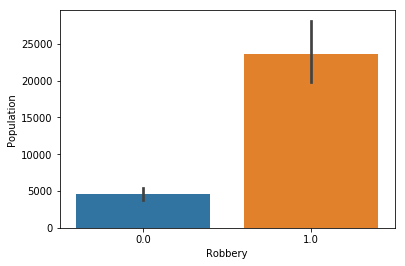

In [34]:
sns.barplot(x='Robbery', y='Population', data=data_group)
plt.show()

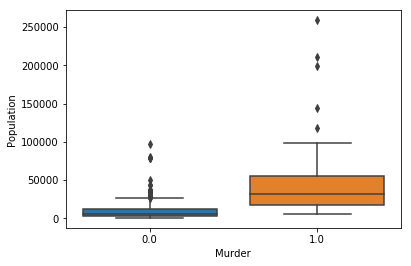

In [35]:
sns.boxplot(
    data_group.Murder,
    data_group.Population,
)
plt.xlabel('Murder')
plt.ylabel('Population')
plt.show()

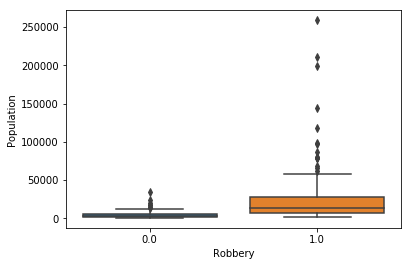

In [36]:
sns.boxplot(
    data_group.Robbery,
    data_group.Population,
)
plt.xlabel('Robbery')
plt.ylabel('Population')
plt.show()

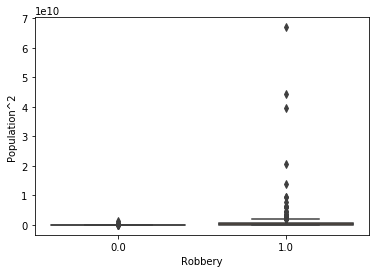

In [37]:
sns.boxplot(
    data_group.Robbery,
    data_group['Population^2'],
)
plt.xlabel('Robbery')
plt.ylabel('Population^2')
plt.show()

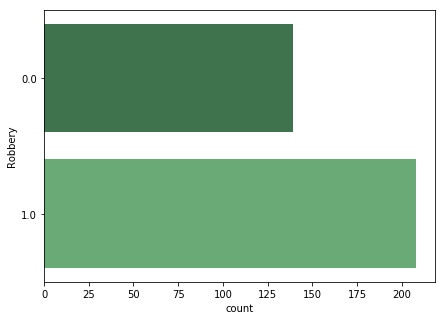

In [38]:
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(y='Robbery', data=data_group, palette="Greens_d")
plt.show()

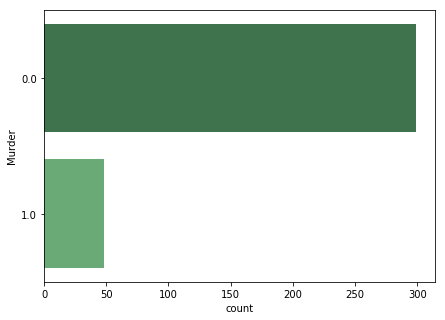

In [39]:
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(y='Murder', data=data_group, palette="Greens_d")
plt.show()

In [40]:
data_group.Population.describe()

count      347.000
mean     15956.686
std      27080.219
min        526.000
25%       2997.000
50%       7187.000
75%      18160.500
max     258789.000
Name: Population, dtype: float64

In [41]:
data_group

,Population,Murder,Robbery,Population^2
0,1861.000,0.000,0.000,3463321.000
1,2577.000,0.000,0.000,6640929.000
2,2846.000,0.000,0.000,8099716.000
3,97956.000,1.000,1.000,9595377936.000
4,6388.000,0.000,1.000,40806544.000
5,4089.000,0.000,1.000,16719921.000
6,1781.000,0.000,0.000,3171961.000
7,118296.000,1.000,1.000,13993943616.000
8,9519.000,0.000,1.000,90611361.000
9,18182.000,0.000,1.000,330585124.000
